In [1]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
np.random.seed(42)

Gaussian creation and test the result of the integral with the Montecarlo integration 

In [2]:
sigma=2
N=10000

gaussian=scipy.stats.norm(loc=0, scale=sigma)

draws = np.abs(gaussian.rvs(N)) # N random draws
p = gaussian.pdf(0) # pdf evaluated at x=0
print('N random draws: ', draws)
print('pdf: ', p)

N random draws:  [0.99342831 0.2765286  1.29537708 ... 1.41063345 0.99153115 1.28877691]
pdf:  0.19947114020071635


(array([0.41135695, 0.37251365, 0.41072018, 0.37824463, 0.37824463,
        0.35977814, 0.35468394, 0.34131165, 0.31584063, 0.29419027,
        0.28909606, 0.24197468, 0.24834243, 0.23942758, 0.1974004 ,
        0.19676362, 0.15792032, 0.16747195, 0.13181252, 0.1349964 ,
        0.11016216, 0.09360599, 0.08660146, 0.06940853, 0.05985689,
        0.05221559, 0.05730979, 0.04457428, 0.02929167, 0.01974004,
        0.02228714, 0.01846649, 0.01655616, 0.01209873, 0.01082518,
        0.00636775, 0.00827808, 0.00827808, 0.00382065, 0.0050942 ,
        0.00318388, 0.0025471 , 0.        , 0.00063678, 0.00063678,
        0.00063678, 0.00063678, 0.        , 0.00063678, 0.00191033]),
 array([4.14129836e-04, 1.57455355e-01, 3.14496581e-01, 4.71537807e-01,
        6.28579032e-01, 7.85620258e-01, 9.42661484e-01, 1.09970271e+00,
        1.25674394e+00, 1.41378516e+00, 1.57082639e+00, 1.72786761e+00,
        1.88490884e+00, 2.04195006e+00, 2.19899129e+00, 2.35603251e+00,
        2.51307374e+00, 2.6701

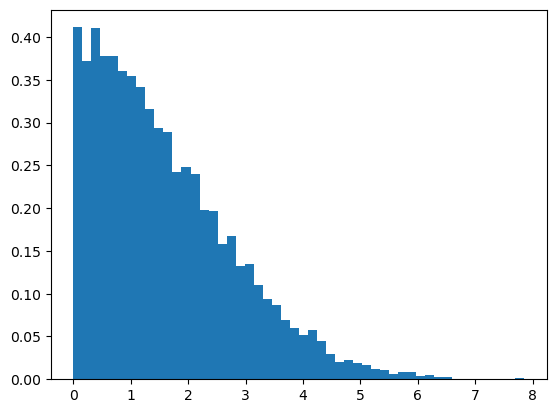

In [3]:
plt.figure(dpi = 100)
plt.hist(draws,density=True,bins=50)

Montecarlo integration result:  32.438581499758946
Given result:  32
Error on the Montecarlo result:  3.5086519980715707


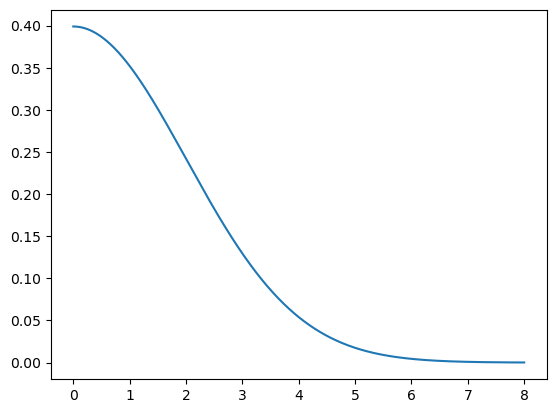

In [4]:
x = np.linspace(0, 4*sigma, 1000)
plt.plot(x, 2*gaussian.pdf(x)) 
#I can sample the gaussian but not the half! the integral of the gaussian is (-inf,+inf), so half is 1/2. the half gaussian is 2 times the gaussian integral

#application of montecarlo method (costants to make the -half- gaussian work and the sum of the gaussian in N)
montecarlo_int = sigma*(np.pi/2)**0.5 * np.mean(draws**3)
print('Montecarlo integration result: ', montecarlo_int)
print('Given result: ', 2*sigma**4)
print('Error on the Montecarlo result: ', np.abs(2*sigma**4-montecarlo_int)/2*sigma**4) #error calculation

To do it many times, a function is needed

In [5]:
def gaussian_int(N,sigma):
    gaussian = scipy.stats.norm(loc=0, scale=sigma)
    draws = np.abs(gaussian.rvs(N))
    norm = sigma*(np.pi/2)**0.5 #costants for normalization
    montecarlo_int = norm * np.mean(draws**3)
    return montecarlo_int

def givenresult(sigma):
    return 2*sigma**4


In [6]:
sigma = 0.5
#Nvals=np.unique(np.linspace(1,1000000,100,dtype=int)) # this is not clear enough to see a pattern
Nvals=np.unique(np.logspace(0,6,1000,dtype=int))

results = []
for N in Nvals:
    results.append(gaussian_int(N, sigma))
results = np.array(results)

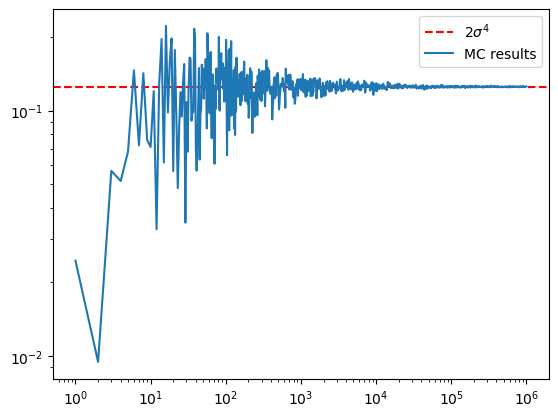

In [7]:
plt.figure(dpi = 100)
plt.axhline(y=givenresult(sigma), color='r', linestyle='--', label='2$\sigma ^4$')    
plt.plot(Nvals, results, label='MC results')
plt.loglog()
plt.legend()
plt.show()

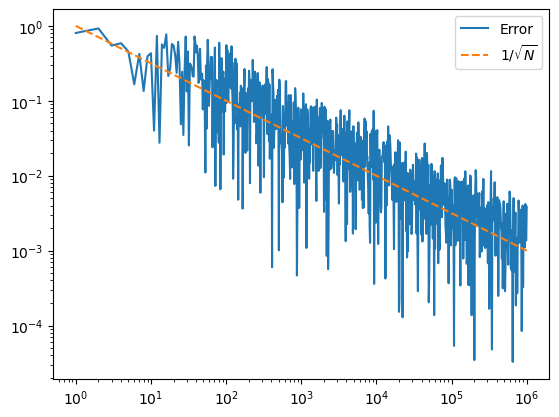

In [8]:
#how does the error go down? I think as 1/root(N)
plt.plot(Nvals,np.abs(givenresult(sigma)-results)/givenresult(sigma), label='Error')
plt.plot(Nvals, 1/np.sqrt(Nvals), '--', label='1/$\sqrt{N}$')
plt.legend()
plt.loglog()
plt.show()

Small N distribution

In [9]:
N=100
samples=100

results = []
for i in range(samples):
    results.append(gaussian_int(N, sigma))
results = np.array(results)

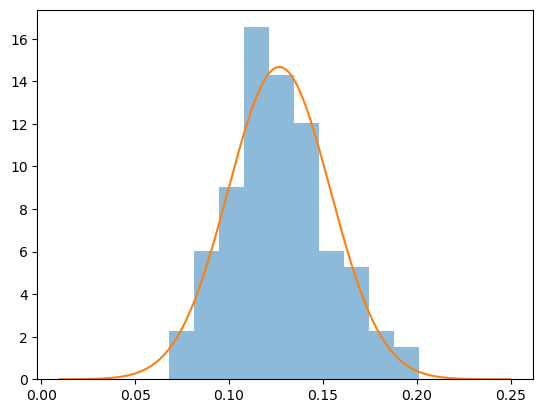

In [10]:
plt.figure(dpi = 100)    
plt.hist(results,density=True,bins=10, alpha=0.5)    
gauss = scipy.stats.norm(loc=np.mean(results),scale=np.std(results, ddof=1))
x = np.linspace(0.01,0.25,1000)
plt.plot(x,gauss.pdf(x))
plt.show()

From previous plot small N produces a not so clear distribution, with some imagination it seems a gaussian anyway.\
Now let's test it with an higher N.

In [11]:
N=10000
samples=10000

results = []
for i in range(samples):
    results.append(gaussian_int(N, sigma))
results = np.array(results)

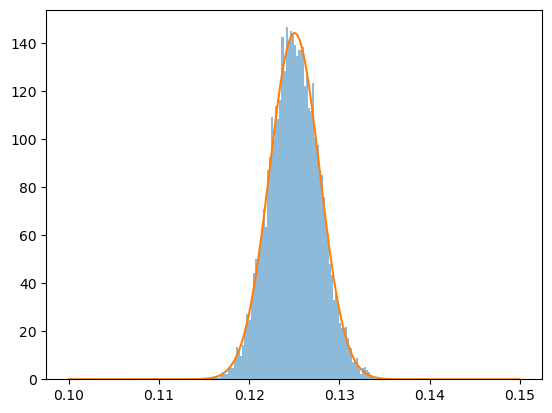

In [12]:
plt.figure(dpi = 100)    
plt.hist(results,density=True,bins=100, alpha=0.5)    
gauss = scipy.stats.norm(loc=np.mean(results),scale=np.std(results, ddof=1))
x = np.linspace(0.1,0.15,1000)
plt.plot(x,gauss.pdf(x))
plt.show()

Now it is a wonderful gaussian.